In [11]:
import cv2
import os
import numpy as np
# import matplotlib.pyplot as plt
# from mtcnn import MTCNN
from keras_facenet import FaceNet
# from threading import Thread


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\SCARWILL PRIME\Desktop\global_env_ANPR\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\SCARWILL PRIME\Desktop\global_env_ANPR\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\SCARWILL PRIME\Desktop\global_env_ANPR\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
  

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [5]:
class FaceLoading(Thread):
    def __init__(self, dir):
        Thread.__init__(self)
        self.dir = dir
        self.target_size = (160, 160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
        self.embedder =  FaceNet()


    def extract_face(self, filename):
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = self.detector.detect_faces(img)
        if faces:
            x, y, w, h = faces[0]['box']
            x, y = abs(x), abs(y)
            face = img[y:y+h, x:x+w]
            face_arr = cv2.resize(face, self.target_size)
            return face_arr
        else:
            return None

    def load_faces(self, dir):
        FACES = []
        for img_name in os.listdir(dir):
            try:
                path = os.path.join(dir, img_name)
                single_face = self.extract_face(path)
                if single_face is not None:
                    FACES.append(single_face)
            except IndexError:
                pass
        return FACES
  
    def load_classes(self):
        for sub_dir in os.listdir(self.dir):
            path = os.path.join(self.dir, sub_dir)
            FACES = self.load_faces(path)
            print("Processing directory:", path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        return np.asarray(self.X), np.asarray(self.Y)

    def plot_images(self):
        plt.figure(figsize=(18, 16))
        for num, image in enumerate(self.X):
            ncols=3
            nrows = len(self.Y)//ncols
            plt.subplot(nrows, ncols, num + 1)
            plt.imshow(image)
            plt.axis("off")
        


In [6]:
faceloading= FaceLoading('./OFFICE_DATASET')
X,Y=faceloading.load_classes()
faceloading.start()
faceloading.join()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━

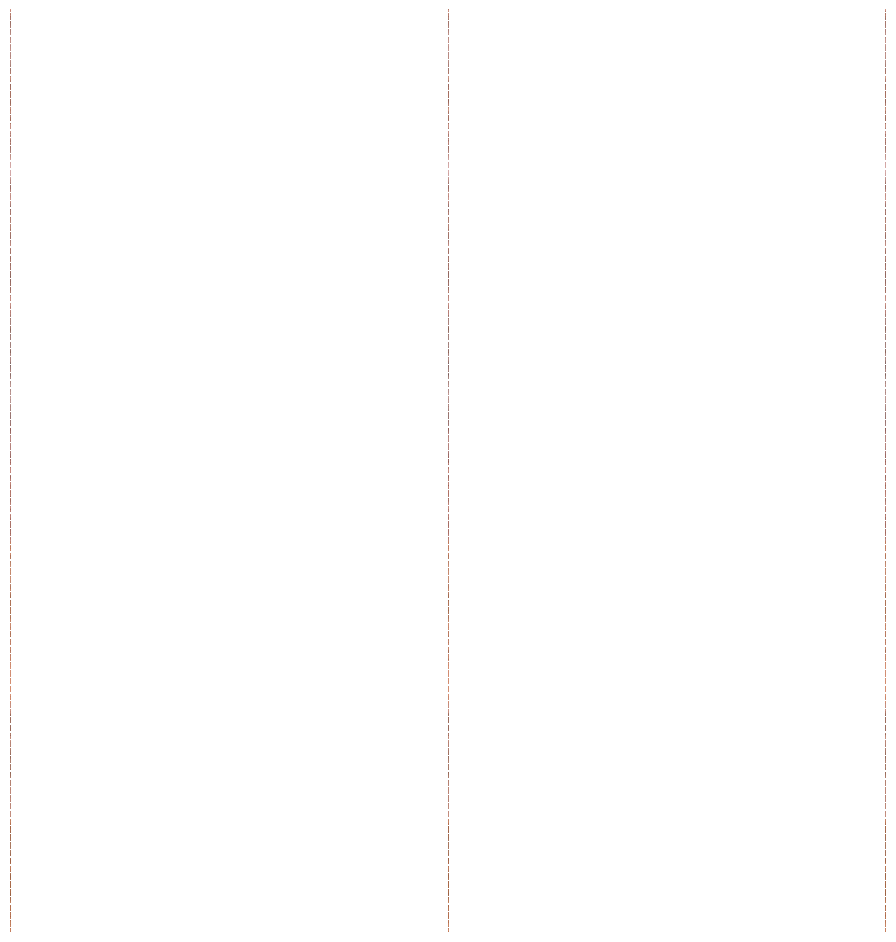

In [7]:


plt.figure(figsize=(16, 12))
for num, image in enumerate(X):
        ncols=3
        nrows = len(Y)//ncols + 1
        plt.subplot(nrows, ncols, num + 1)
        plt.imshow(image)
        plt.axis("off")
        

In [8]:
embedder = FaceNet()
def get_embedding(face_img):
    face_img = face_img.astype('float32')
    face_img = np.expand_dims(face_img, axis=0)
    yhat = embedder.embeddings(face_img)
    return yhat[0]

In [9]:
EMBEDDED_X=[]
for img in X:
    EMBEDDED_X.append(get_embedding(img))
EMBEDDED_X=np.asarray(EMBEDDED_X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━

In [10]:
EMBEDDED_X

array([[-0.0178764 ,  0.03370893,  0.00032104, ..., -0.02969622,
        -0.02943468,  0.00677161],
       [-0.01326225,  0.021307  , -0.0300379 , ..., -0.04588393,
        -0.01355123,  0.02163345],
       [-0.00700515,  0.05421288, -0.00045116, ..., -0.05159725,
        -0.0120931 ,  0.00617022],
       ...,
       [ 0.05784327, -0.0032727 , -0.03220727, ...,  0.02736318,
         0.01050641,  0.04448137],
       [ 0.06102339, -0.02034004, -0.04217273, ...,  0.01844899,
         0.00217191,  0.03949169],
       [ 0.0568461 , -0.00558016, -0.03372323, ...,  0.02843483,
         0.01085111,  0.05239464]], dtype=float32)

In [11]:
np.savez_compressed("faces_embedding_done_cp_4classes_office2.npz", EMBEDDED_X, Y)

In [12]:
Y

array(['Durvesh', 'Durvesh', 'Durvesh', ..., 'Starwill', 'Starwill',
       'Starwill'], dtype='<U9')

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(Y)
Y=encoder.transform(Y)


In [14]:
Y

array([0, 0, 0, ..., 6, 6, 6])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(EMBEDDED_X,Y, test_size=0.2, shuffle=True, random_state= 17)

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


In [17]:
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf'],
    'svc__degree': [2, 3, 4],  
    'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001] 
}

In [18]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True))
])

In [19]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100], 'svc__degree': [2, 3, 4],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svc__kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [20]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [21]:
print("Best parameters found: ", best_params)
print("Best accuracy: ", grid_search.best_score_)

Best parameters found:  {'svc__C': 0.1, 'svc__degree': 2, 'svc__gamma': 1, 'svc__kernel': 'linear'}
Best accuracy:  1.0


In [22]:
print(grid_search.best_estimator_) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, degree=2, gamma=1, kernel='linear',
                     probability=True))])


In [24]:
from sklearn.svm import SVC
model=Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', degree=2,  gamma=1, probability=True,C=0.1))
])
model.fit(X_train,Y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, degree=2, gamma=1, kernel='linear',
                     probability=True))])

In [25]:
ypreds=model.predict(X_test)
ypreds

array([1, 3, 1, 1, 4, 1, 2, 1, 4, 1, 1, 3, 0, 4, 3, 4, 0, 6, 2, 4, 1, 3,
       2, 4, 6, 1, 0, 1, 4, 5, 1, 2, 5, 6, 3, 5, 3, 0, 1, 4, 4, 4, 1, 3,
       0, 2, 5, 6, 1, 1, 6, 4, 5, 4, 2, 0, 0, 5, 4, 1, 1, 1, 5, 2, 0, 3,
       1, 5, 1, 3, 2, 1, 1, 6, 5, 5, 3, 1, 0, 6, 4, 4, 6, 1, 4, 3, 1, 2,
       4, 1, 0, 0, 2, 2, 1, 4, 1, 6, 5, 1, 6, 6, 1, 2, 3, 6, 0, 1, 2, 0,
       4, 4, 4, 2, 1, 4, 3, 1, 0, 3, 5, 2, 1, 4, 4, 3, 4, 1, 2, 4, 6, 2,
       6, 1, 3, 2, 2, 0, 4, 5, 0, 1, 6, 0, 4, 5, 0, 3, 6, 4, 3, 2, 5, 2,
       0, 6, 0, 1, 0, 1, 4, 6, 3, 5, 0, 3, 2, 6, 1, 1, 2, 4, 1, 6, 1, 6,
       5, 6, 0, 1, 5, 3, 0, 1, 6, 2, 2, 6, 1, 0, 4, 2, 1, 1, 1, 6, 6, 5,
       0, 2, 2, 1, 4, 1, 3, 6, 5, 5, 3, 3, 3, 5, 5, 1, 2, 1, 5, 2, 4, 0,
       0, 4, 0, 0, 4, 1, 0, 4, 4, 1, 2, 0, 5, 2, 6, 1, 6, 6, 4, 1, 3, 4,
       5, 1, 3, 0, 5, 1, 3, 4, 6, 2, 3, 4, 4, 6, 1, 5, 1, 0, 1, 5, 4, 4,
       3, 2, 4, 4, 3, 1, 6, 5, 3, 5, 4, 1, 5, 6, 1, 4, 2, 4, 4, 3, 4, 6,
       3, 3, 1, 0, 6, 3, 5, 6, 1, 2, 6, 1, 4, 4, 5,

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,ypreds)

1.0

In [27]:

import pickle 

In [28]:
path="svm_4_classes_office2.pkl"
with open(path,'wb') as file:
    pickle.dump(model,file)

